<a href="https://colab.research.google.com/github/aristwn97/EDA/blob/main/dicoding_ML_submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import package tensorflow
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# print tensorflow version
print(tf.__version__)

2.4.1


In [3]:
# download dataset
!wget --no-check-certificate https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip -O rockpaperscissors.zip


--2021-05-03 05:44:56--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  7.40MB/s    in 49s     

2021-05-03 05:45:46 (6.26 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



In [4]:
#extract dataset
import zipfile,os
local_zip = 'rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('rps')
zip_ref.close()

In [5]:
!pip install split_folders

In [6]:
#import folders from split folder
import splitfolders

splitfolders.ratio('rps/rockpaperscissors/rps-cv-images','rps/rockpaperscissors/data', seed=1, ratio=(.8,.2))

Copying files: 2188 files [00:00, 4079.90 files/s]


In [7]:
#import folders from split folder
import splitfolders

splitfolders.ratio('rps/rockpaperscissors/rps-cv-images','rps/rockpaperscissors/data', seed=1, ratio=(.8,.2))

Copying files: 2188 files [00:02, 881.60 files/s]


In [8]:
#create name directory
base_dir = 'rps/rockpaperscissors/data'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

#create directory train and validation
os.listdir('rps/rockpaperscissors/data/train')
os.listdir('rps/rockpaperscissors/data/val')

['rock', 'paper', 'scissors']

In [9]:
train_rock_dir = os.path.join(train_dir, 'train')
train_scissors_dir = os.path.join(train_dir, 'scissors')
train_paper_dir = os.path.join(train_dir, 'paper')
 
validation_crock_dir = os.path.join(validation_dir, 'rock')
validation_scissors_dir = os.path.join(validation_dir, 'scissors')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [10]:
# create image data generator

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
  rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
  shear_range=0.2, #to apply some random tranfromations
  zoom_range=0.2, #to apply zoom
  horizontal_flip=True) # image will be flipper horiztest_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(
  rescale=1./255, # rescale all pixel values from 0-255, so aftre this step all our pixel values are in range (0,1)
  shear_range=0.2, #to apply some random tranfromations
  zoom_range=0.2, #to apply zoom
  horizontal_flip=True) 

[Tutorial on Using Keras flow_from_directory and generators](https://vijayabhaskar96.medium.com/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720)

In [11]:
train_generator = train_datagen.flow_from_directory(
  train_dir, 
  target_size=(224, 224),
  batch_size=32, 
  color_mode='rgb', 
  class_mode='categorical',
  shuffle = True, 
  seed=42) 
validation_generator = test_datagen.flow_from_directory(
  validation_dir,
  target_size=(224, 224),
  batch_size=32,
  color_mode='rgb',
  class_mode='categorical',
  shuffle = True,
  seed=42)

Found 1749 images belonging to 3 classes.
Found 439 images belonging to 3 classes.


**Visualize Training and Validation Images**

In [12]:
# sample training 
train_sample_images, _ = next(train_generator)
validation_sample_images, _ = next(validation_generator)

In [13]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(25,25))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

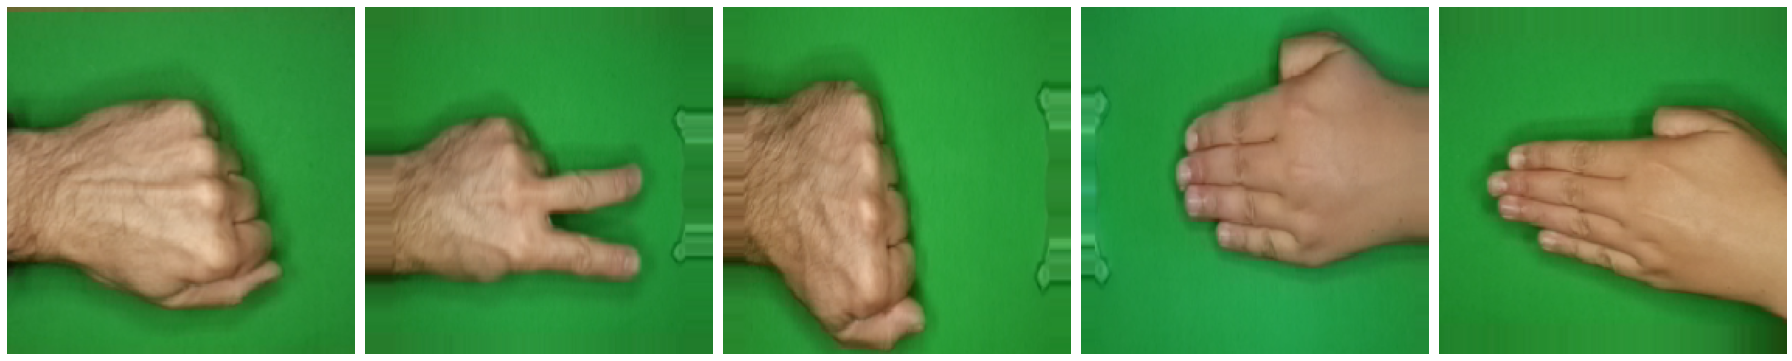

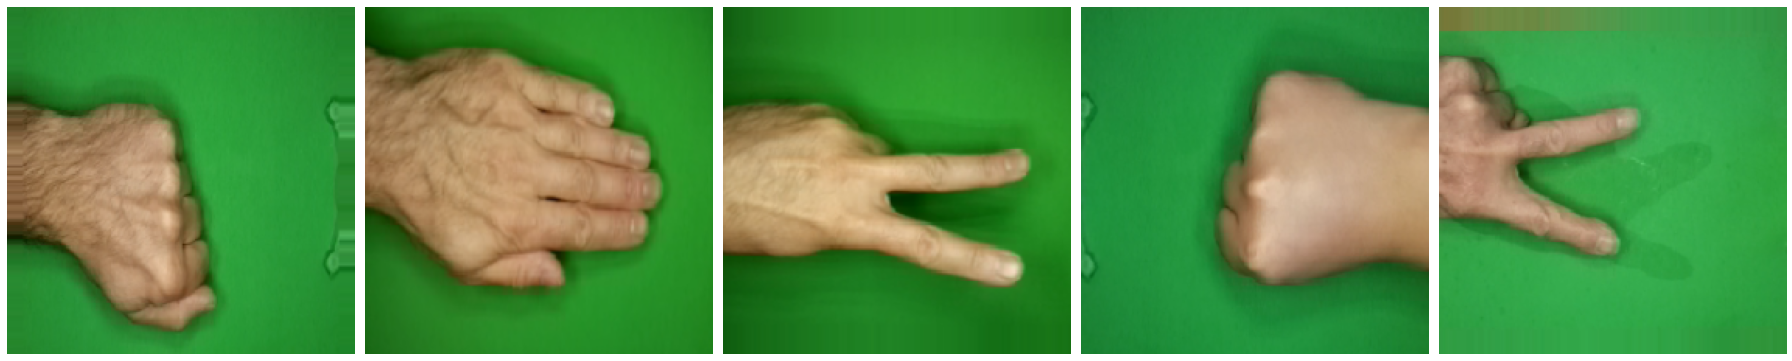

In [14]:
import matplotlib.pyplot as plt

plotImages(train_sample_images[:5])
plotImages(validation_sample_images[:5])

In [15]:
# create model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 256)       2

In [16]:
# judge perfomance models
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [17]:
record = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose =2
)

Epoch 1/20
25/25 - 80s - loss: 1.1684 - accuracy: 0.3713 - val_loss: 1.0604 - val_accuracy: 0.3625
Epoch 2/20
25/25 - 78s - loss: 0.8632 - accuracy: 0.6175 - val_loss: 0.5661 - val_accuracy: 0.7750
Epoch 3/20
25/25 - 76s - loss: 0.4395 - accuracy: 0.8302 - val_loss: 0.3313 - val_accuracy: 0.8750
Epoch 4/20
25/25 - 77s - loss: 0.3555 - accuracy: 0.8631 - val_loss: 0.2632 - val_accuracy: 0.9125
Epoch 5/20
25/25 - 77s - loss: 0.3026 - accuracy: 0.9000 - val_loss: 0.2574 - val_accuracy: 0.8938
Epoch 6/20
25/25 - 77s - loss: 0.2142 - accuracy: 0.9125 - val_loss: 0.1553 - val_accuracy: 0.9563
Epoch 7/20
25/25 - 77s - loss: 0.2293 - accuracy: 0.9138 - val_loss: 0.2172 - val_accuracy: 0.9312
Epoch 8/20
25/25 - 77s - loss: 0.1829 - accuracy: 0.9337 - val_loss: 0.1884 - val_accuracy: 0.9312
Epoch 9/20
25/25 - 77s - loss: 0.1782 - accuracy: 0.9362 - val_loss: 0.1710 - val_accuracy: 0.9312
Epoch 10/20
25/25 - 76s - loss: 0.1612 - accuracy: 0.9430 - val_loss: 0.1151 - val_accuracy: 0.9563
Epoch 11/

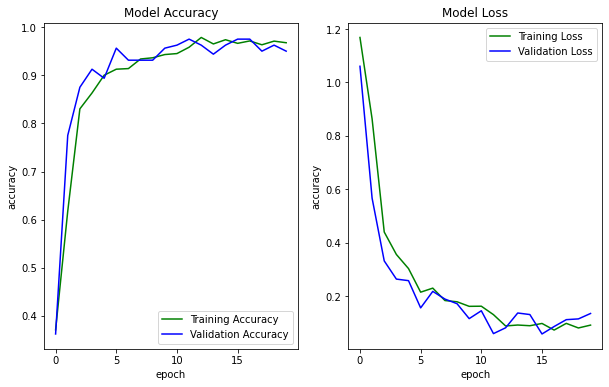

In [18]:
# plot model accuracy and model loss
import matplotlib.pyplot as plt


acc = record.history['accuracy']
val_acc =record.history['val_accuracy']

loss = record.history['loss']
val_loss = record.history['val_loss']

plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot( acc, label='Training Accuracy', color='green')
plt.plot( val_acc, label='Validation Accuracy', color='blue')
plt.legend(loc='lower right')
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.subplot(1, 2, 2)
plt.plot( loss, label='Training Loss', color='green')
plt.plot( val_loss, label='Validation Loss', color='blue')
plt.legend(loc='upper right')
plt.title('Model Loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()



In [19]:
pip install google-colab

Saving 2uxDLQKemRqulhIx.png to 2uxDLQKemRqulhIx.png
2uxDLQKemRqulhIx.png
Rock


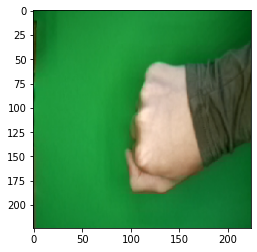

In [21]:
import numpy as np 
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()
 

for fn in uploaded.keys():

  # predicting images
  path = fn 
  img = image.load_img(path, target_size =(224,224))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)

  print(fn)
  if classes[0,0]!=0:
    print('Paper')
  elif classes[0,1]!=0:
    print('Rock')
  else:
    print('Scissors')